In [2]:
import cv2
import glob
import numpy as np
from funs import Imshow
import random
from matplotlib import pyplot as plt

#### 随机翻转

In [3]:
def randomflip(img):
    sw = random.randint(0, 2)
    if sw == 0:
        dst = cv2.flip(img, 1)  # y轴
    elif sw == 1:
        dst = cv2.flip(img, 0)  # x轴
    else:
        dst = cv2.flip(img, -1)  # x,y
    return dst

#### 梯度运算

In [4]:
def tiduyunsuan(img):
    k = np.ones((7, 7), np.uint8)
    dst = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)
    return dst

#### 灰度图像

In [5]:
def togray(img):
    dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return dst

#### 添加噪声

In [6]:
'''
添加椒盐噪声
prob:噪声比例
'''
def sp_noise(image, prob):
    dst = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                dst[i][j] = 0
            elif rdn > thres:
                dst[i][j] = 150
            else:
                dst[i][j] = image[i][j]
    return dst

#### 随机剪裁

In [7]:
def Randomcorp(img):
    h=random.randint(0,159)
    w=random.randint(0,159)
    img = cv2.resize(img,(384,384))
    cropped = img[h:h+224, w:w+224]#384
    return cropped

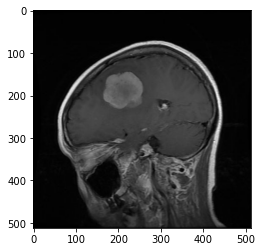

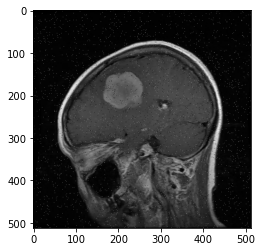

In [8]:
#看画儿用的cell
img = cv2.imread('TEST/m/train_m610.jpg')
Imshow(img)
dst = sp_noise(img,0.01)
Imshow(dst)

#### 批量处理

In [9]:
i = 0
for jpgfile in glob.glob('Tumor/Training/pituitary_tumor/*.jpg'):
    img = cv2.imread(jpgfile)
    # ——————————————————————
    # function
    dst = Randomcorp(img)
    # ——————————————————————
    cv2.imwrite('Tumor/Training/pituitary_tumor/rc_train_p{}.jpg'.format(i), dst)
    i = i + 1